In [1]:
library(Seurat)

Attaching SeuratObject

Attaching sp



In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
obj = qs::qread('_targets/objects/obj_Agrp')
obj

An object of class Seurat 
2000 features across 4638 samples within 1 assay 
Active assay: integrated (2000 features, 2000 variable features)
 2 dimensional reductions calculated: pca, umap

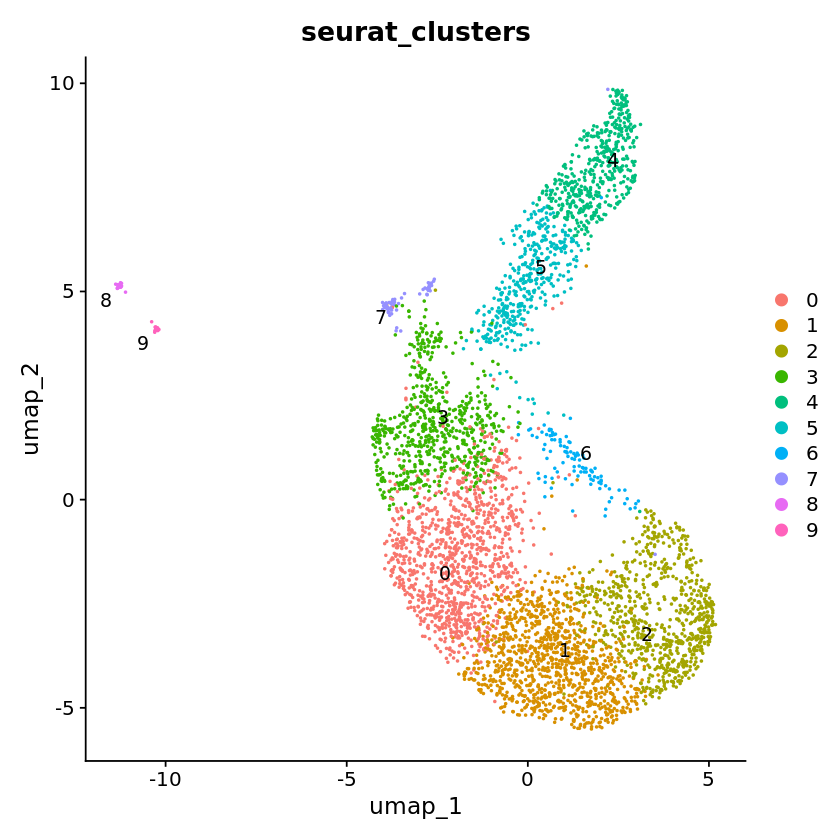

In [4]:
obj %>% DimPlot(reduction = "umap", group.by='seurat_clusters', label=T, repel = T)

In [5]:
GetAssayData(obj, assay = "RNA", slot = "counts")

ERROR: Error: 'RNA' is not an assay


In [6]:
GetAssay(obj, 'RNA')

ERROR: Error in GetAssay.Seurat(obj, "RNA"): RNA is not an assay present in the given object. Available assays are: integrated


In [8]:
rna = obj@assays$RNA

In [9]:
obj@assays$integrated

Assay data with 2000 features for 4638 cells
Top 10 variable features:
 Il1rapl2, Lingo2, Grm7, Gm15398, Cntn4, Nrg1, Zfp804b, Rgs6, Trpm3,
Gpc5 

In [109]:
Seurat_v5_to_v4 = function(obj){
    RNA_counts = obj@assays$RNA %>% attr(.,"layers") %>% `[[`('counts')
    cell_names = obj@meta.data %>% rownames
    feature_names = obj@assays$RNA %>% attr("features") %>% attr("dimnames") %>% `[[`(1)
    colnames(RNA_counts) = cell_names
    rownames(RNA_counts) = feature_names
    new_obj = CreateSeuratObject(counts = RNA_counts, meta.data = obj@meta.data)
    new_obj[['integrated']] = CreateAssayObject(data = attr(obj@assays$integrated, "scale.data"))
    new_obj[['umap']] = obj[['umap']]
    new_obj[['pca']] = obj[['pca']]
    new_obj
}

In [111]:
nobj = obj %>% Seurat_v5_to_v4

In [112]:
DefaultAssay(nobj) = 'integrated'

In [113]:
nobj

An object of class Seurat 
21774 features across 4638 samples within 2 assays 
Active assay: integrated (2000 features, 0 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: umap, pca

In [116]:
obj %>% as(object = obj[["RNA"]], Class = "Assay4")

ERROR: Error in as(., object = obj[["RNA"]], Class = "Assay4"): no method or default for coercing “Assay5” to “Assay4”
